Overview: Have you ever wondered how popular streaming services like Netflix or Disney Plus provides movie recommendations? This Jupyter Notebook will show you how to create a simple and effective movie recommendation system based on the Marvel Cinematic Universe (MSU). This movie recommendation system is intended for new Marvel viewers and I will demonstrate how to create a movie recommentation system in a data analytics perspective using Pandas.¶


import lib 

In [175]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings 
warnings.filterwarnings("ignore")


# text preprocessing 
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## dorp the model in pickle 
import pickle


 Load the dataset

In [176]:
nf_movie=pd.read_csv('D:\\NF_Recommendations\\data\\netflix_titles.csv')

In [177]:
nf_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [178]:
print(nf_movie.shape)

(8807, 12)


In [179]:
print(nf_movie.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [180]:
nf_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [181]:
# # tags 
# type 
# director 
# cast 
# country 
# release_year 
# rating 
# description 

In [182]:
nf_movie.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [183]:
nf_movie = nf_movie[['type','title','director','cast','release_year','rating','description']]

In [184]:
nf_movie.head(4)

,type,title,director,cast,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2020,PG-13,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."


In [185]:
null_values = nf_movie.isnull().sum()
print(f"Null values : {null_values}")


Null values : type               0
title              0
director        2634
cast             825
release_year       0
rating             4
description        0
dtype: int64


In [186]:
null_values = nf_movie.isnull().sum()
total_values = len(nf_movie)  # Total number of rows

null_percentage = (null_values / total_values) * 100
print("Percentage of null values in each column:\n", null_percentage)


Percentage of null values in each column:
 type             0.000000
title            0.000000
director        29.908028
cast             9.367549
release_year     0.000000
rating           0.045418
description      0.000000
dtype: float64


In [187]:
nf_movie.head()

,type,title,director,cast,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2020,PG-13,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,TV-MA,In a city of coaching centers known to train I...


In [188]:
# Selecting categorical columns
categorical_cols = ['director', 'cast']  # Add other columns if needed

# Creating an imputer instance
imputer = SimpleImputer(strategy='most_frequent')



# Applying the imputer
nf_movie[categorical_cols] = imputer.fit_transform(nf_movie[categorical_cols])

In [189]:
nf_movie = nf_movie.dropna(subset=['rating'])

# Verify if null values are removed
print(nf_movie.isnull().sum())


type            0
title           0
director        0
cast            0
release_year    0
rating          0
description     0
dtype: int64


In [190]:
# Check for duplicate rows
duplicates = nf_movie.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [191]:
nf_movie.head()

,type,title,director,cast,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,2020,PG-13,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,TV-MA,In a city of coaching centers known to train I...


In [192]:
nf_movie['type'].value_counts()

type
Movie      6129
TV Show    2674
Name: count, dtype: int64

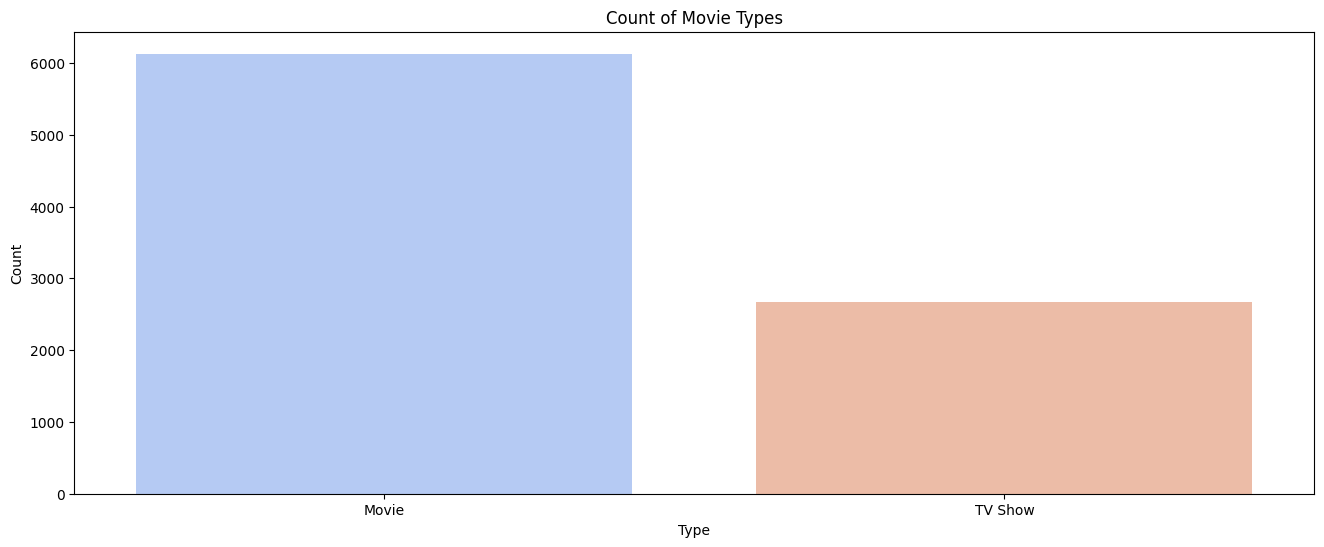

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the countplot
plt.figure(figsize=(16,6))
sns.countplot(x=nf_movie['type'], palette='coolwarm')

# Labels and title
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Count of Movie Types")
plt.show()


In [194]:
print(nf_movie.columns)

Index(['type', 'title', 'director', 'cast', 'release_year', 'rating',
       'description'],
      dtype='object')


In [195]:
nf_movie.head()

,type,title,director,cast,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,2020,PG-13,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,TV-MA,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,TV-MA,In a city of coaching centers known to train I...


In [196]:
nf_movie['cast']

0                                      David Attenborough
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                      David Attenborough
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                   David Attenborough
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8803, dtype: object

In [197]:
nf_movie['cast'] = nf_movie['cast'].apply(lambda x: ', '.join(x.split(', ')[:3]) if isinstance(x, str) else x)


In [198]:
nf_movie.head()

,type,title,director,cast,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,2020,PG-13,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane",2021,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy",2021,TV-MA,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj",2021,TV-MA,In a city of coaching centers known to train I...


In [199]:
import datetime

current_year = datetime.datetime.now().year
nf_movie['release_year'] = current_year - nf_movie['release_year']


In [200]:
nf_movie['release_year'].value_counts()

release_year
7      1147
8      1031
6      1030
5       953
9       902
       ... 
64        1
100       1
66        1
59        1
78        1
Name: count, Length: 74, dtype: int64

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nf_movie[['release_year']] = scaler.fit_transform(nf_movie[['release_year']])

In [202]:
nf_movie.head()

,type,title,director,cast,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,-0.659828,PG-13,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane",-0.773197,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy",-0.773197,TV-MA,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,-0.773197,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj",-0.773197,TV-MA,In a city of coaching centers known to train I...


In [203]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Transform the rating column
nf_movie['rating'] = encoder.fit_transform(nf_movie[['rating']])



In [205]:
nf_movie.head()

,type,title,director,cast,release_year,rating,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,-0.659828,0.0,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane",-0.773197,0.0,"After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy",-0.773197,0.0,To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,-0.773197,0.0,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj",-0.773197,0.0,In a city of coaching centers known to train I...


In [207]:
nf_movie['tags'] = nf_movie['description'] + nf_movie['director'] + nf_movie['type'] + nf_movie['cast'] 

In [210]:
nf_movie = nf_movie.drop(columns=['description','director','type','cast'])
nf_movie.head(2)

,title,release_year,rating,tags
0,Dick Johnson Is Dead,-0.659828,0.0,"As her father nears the end of his life, filmm..."
1,Blood & Water,-0.773197,0.0,"After crossing paths at a party, a Cape Town t..."


In [218]:
nf_movie['tags'][100]

'An intergalactic device transforms toy cars into robots: the Tobots! Working with friends to solve mysteries, they protect the world from evil.Rajiv ChilakaTV ShowAustin Abell, Travis Turner, Cole Howard'

In [219]:
nf_movie['release_year']

0      -0.659828
1      -0.773197
2      -0.773197
3      -0.773197
4      -0.773197
          ...   
8802    0.813970
8803   -0.433090
8804    0.587232
8805    0.927339
8806   -0.092982
Name: release_year, Length: 8803, dtype: float64

Text preprocessing 

In [221]:
nf_movie.head()

,title,release_year,rating,tags
0,Dick Johnson Is Dead,-0.659828,0.0,"As her father nears the end of his life, filmm..."
1,Blood & Water,-0.773197,0.0,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,-0.773197,0.0,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,-0.773197,0.0,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,-0.773197,0.0,In a city of coaching centers known to train I...


In [222]:
# lower casing 
nf_movie['tags'] = nf_movie['tags'].str.lower()

In [224]:
import string
exclude  = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [226]:
nf_movie['tags'][100]

'an intergalactic device transforms toy cars into robots: the tobots! working with friends to solve mysteries, they protect the world from evil.rajiv chilakatv showaustin abell, travis turner, cole howard'

In [233]:
# Remove punctuation from the 'Text' column
nf_movie['tags'] = nf_movie['tags'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [234]:
nf_movie.head()

,title,release_year,rating,tags
0,Dick Johnson Is Dead,-0.659828,0.0,as her father nears the end of his life filmma...
1,Blood & Water,-0.773197,0.0,after crossing paths at a party a cape town te...
2,Ganglands,-0.773197,0.0,to protect his family from a powerful drug lor...
3,Jailbirds New Orleans,-0.773197,0.0,feuds flirtations and toilet talk go down amon...
4,Kota Factory,-0.773197,0.0,in a city of coaching centers known to train i...


In [235]:
# Download the stop words list
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [236]:
# Set of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the 'Text' column
nf_movie['tags'] = nf_movie['tags'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [237]:
nf_movie.head()

,title,release_year,rating,tags
0,Dick Johnson Is Dead,-0.659828,0.0,father nears end life filmmaker kirsten johnso...
1,Blood & Water,-0.773197,0.0,crossing paths party cape town teen sets prove...
2,Ganglands,-0.773197,0.0,protect family powerful drug lord skilled thie...
3,Jailbirds New Orleans,-0.773197,0.0,feuds flirtations toilet talk go among incarce...
4,Kota Factory,-0.773197,0.0,city coaching centers known train india ’ fine...
